In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_data= pd.read_csv('/content/drive/MyDrive/train.csv')
test_data= pd.read_csv('/content/drive/MyDrive/test.csv')
train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
train_data.drop(['ADDRESS'],axis=1,inplace=True)
test_data.drop(['ADDRESS'],axis=1,inplace=True)

In [5]:
# dropping longitude and latitude features
train_data.drop(['LATITUDE','LONGITUDE'], axis=1, inplace=True)
test_data.drop(['LATITUDE','LONGITUDE'], axis=1, inplace=True)

## **LABEL ENCODING**

In [6]:
# mapping the categorical data to numerical values
train_data['BHK_OR_RK'] = train_data['BHK_OR_RK'].map({'BHK':1, 'RK':1})
train_data['POSTED_BY'] = train_data['POSTED_BY'].map({'Owner':1, 'Dealer':2, 'Builder':3})

test_data['POSTED_BY'] = test_data['POSTED_BY'].map({'Owner':1, 'Dealer':2, 'Builder':3})
test_data['BHK_OR_RK'] = test_data['BHK_OR_RK'].map({'BHK':1, 'RK':1})

In [7]:
test_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE
0,1,0,0,1,1,545.171340,1,1
1,2,1,1,2,1,800.000000,0,0
2,2,0,0,2,1,1257.096513,1,1
3,2,0,0,3,1,1400.329489,1,1
4,1,0,0,1,1,430.477830,1,1


In [8]:
train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS)
0,1,0,0,2,1,1300.236407,1,1,55.0
1,2,0,0,2,1,1275.000000,1,1,51.0
2,1,0,0,2,1,933.159722,1,1,43.0
3,1,0,1,2,1,929.921143,1,1,62.5
4,2,1,0,2,1,999.009247,0,1,60.5


## **TRAIN VALIDATION SPLIT**

In [9]:
X = train_data.drop('TARGET(PRICE_IN_LACS)', axis=1) #Features
Y = train_data['TARGET(PRICE_IN_LACS)']  #Target

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=42)

print('train features shape:', X_train.shape, ';', 'train label shape:', Y_train.shape)
print('validation features shape:', X_val.shape, ';', 'validation label shape:', Y_val.shape)


train features shape: (26505, 8) ; train label shape: (26505,)
validation features shape: (2946, 8) ; validation label shape: (2946,)


## **MACHINE LEARNING ALGORITHMS**

---



*   Linear Regression
*   Decision Tree
*   Random Forest
*   Gradient Boosting
*   MLP(Multi Layer Perceptron) Regressor  


## *LINEAR REGRESSION*

In [11]:
# creating a models
models = dict()

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
print(lin_reg)
lin_reg.fit(X_train, Y_train)
print("Score on training data:", lin_reg.score(X_train,Y_train))
print("Score on validation data:", lin_reg.score(X_val,Y_val))

LinearRegression()
Score on training data: 0.1422587189434119
Score on validation data: 0.50224346077245


In [ ]:
models['lin_reg'] = lin_reg.score(X_val,Y_val)

## *DECISION TREE REGRESSOR*

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
print(tree)
tree.fit(X_train, Y_train)
print("Score on training data:", tree.score(X_train,Y_train))
print("Score on validation data:", tree.score(X_val,Y_val))

DecisionTreeRegressor()
Score on training data: 0.9958766387740389
Score on validation data: 0.6956310592098325


In [ ]:
models['tree'] = tree.score(X_val,Y_val)

## *RANDOM FOREST REGRESSOR*

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=50, max_features='sqrt')  # Change 'auto' to 'sqrt'
print(forest)
forest.fit(X_train, Y_train)
print("Score on training data:", forest.score(X_train,Y_train))
print("Score on validation data:", forest.score(X_val,Y_val))


RandomForestRegressor(max_features='sqrt', n_estimators=50)
Score on training data: 0.9668745860265417
Score on validation data: 0.491346578754978


In [ ]:
models['forest'] = forest.score(X_val,Y_val)

## *Gradient Boosting Regressor*

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
boosting = GradientBoostingRegressor(n_estimators=2000, max_depth=5, learning_rate=0.1)
print(boosting)
boosting.fit(X_train, Y_train)
print("Score on training data:", boosting.score(X_train,Y_train))
print("Score on validation data:", boosting.score(X_val,Y_val))

GradientBoostingRegressor(max_depth=5, n_estimators=2000)
Score on training data: 0.9915112859209289
Score on validation data: 0.693233812418332


In [ ]:
models['boosting'] = boosting.score(X_val,Y_val)

## *MLP*

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, learning_rate_init=0.01, random_state=42)
print(mlp)
mlp.fit(X_train, Y_train)
print("Score on training data:", mlp.score(X_train, Y_train))
print("Score on validation data:", mlp.score(X_val, Y_val))
models['mlp'] = mlp.score(X_val, Y_val)


MLPRegressor(learning_rate_init=0.01, max_iter=1000, random_state=42)
Score on training data: 0.03448247543870908
Score on validation data: 0.44960795578542


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
#tuned hyperparameters
mlp = MLPRegressor(hidden_layer_sizes=(150, 100),
max_iter=3000,
learning_rate_init=0.001,
alpha=0.0001,
early_stopping=True,
random_state=42)
mlp.fit(X_train_scaled, Y_train)
print("Score on training data:", mlp.score(X_train_scaled, Y_train))
print("Score on validation data:", mlp.score(X_val_scaled, Y_val))


Score on training data: 0.8894947302706211
Score on validation data: 0.7479323026636209


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
#optimized MLP Regressor
mlp = MLPRegressor(
    hidden_layer_sizes=(200, 150, 100),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=5000,
    early_stopping=True,
    random_state=42
)
mlp.fit(X_train_scaled, Y_train)
print("Score on training data:", mlp.score(X_train_scaled, Y_train))
print("Score on validation data:", mlp.score(X_val_scaled, Y_val))
# scores = cross_val_score(mlp, X_train_scaled, Y_train, cv=5, scoring='r2')
# print("Cross-Validation Scores:", scores)
# print("Mean Validation Score:", scores.mean())



Score on training data: 0.8940461239501593
Score on validation data: 0.8816878656997658


In [ ]:
# Save the validation score dictionary
models['mlp'] = mlp.score(X_val_scaled, Y_val)

## **PERFORMANCE COMPARISON GRAPH**

<ipython-input-45-ecd147ccc294>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keys, y=values, palette=palette, edgecolor='black')
<ipython-input-45-ecd147ccc294>:19: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(x=keys, y=values, palette=palette, edgecolor='black')


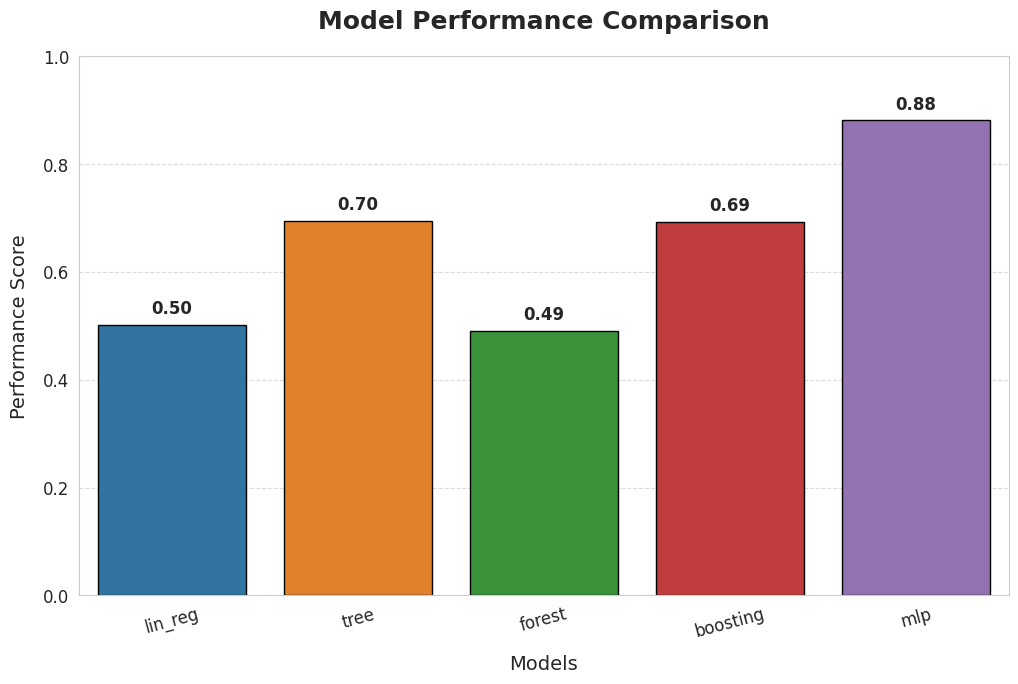

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
palette = sns.color_palette("tab10")
plt.figure(figsize=(12, 7))
keys = list(models.keys())
values = list(models.values())
sns.barplot(x=keys, y=values, palette=palette, edgecolor='black')
plt.title("PERFORMANCE COMPARISON GRAPH", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Models", fontsize=14, labelpad=10)
plt.ylabel("Performance Score", fontsize=14, labelpad=10)
plt.xticks(fontsize=12, rotation=15)
plt.yticks(fontsize=12)
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, value in enumerate(values):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center', fontsize=12, fontweight='bold')

plt.show()


The Validation Score of the MLP is higher than others


In [30]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Length of Y: {len(Y)}")


Shape of X_train: (26505, 8)
Length of Y: 29451


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [32]:
min_length = min(len(X_train), len(Y))
X_train = X_train[:min_length]
Y = Y[:min_length]


In [33]:
mlp.fit(X_train,Y )

#prediction on testing dataset
Y_pred = mlp.predict(test_data)

In [34]:
Y_pred = pd.DataFrame(Y_pred)

In [35]:
Y_pred.to_csv('prediction.csv')

In [36]:
from google.colab import files
files.download("prediction.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
prediction= pd.read_csv('prediction.csv')
prediction

,Unnamed: 0,0
0,0,117.481169
1,1,145.949220
2,2,146.518834
3,3,163.954979
4,4,102.537432
...,...,...
68715,68715,172.480471
68716,68716,146.820466
68717,68717,-14.425574
68718,68718,147.886421
